# Measure Pk covariance

In [1]:
from matplotlib import pyplot as plt
import numpy as np

import logging
logging.basicConfig(level=logging.WARNING)

import tqdm

from synmock import simbox, model
import fftutils
import bins

In [2]:
params = {
    'box_length': 1024,
    'cell_size': 8.,
    'non_linear':'halofit',
    'bias': 1.5,
    'z_pk': 0.5
}

In [3]:
M = model.ModelPk(**params)

In [4]:
length = np.ones(3)*params['box_length']
shape = (length / (np.ones(3)*params['cell_size'])).astype(int)
print(f"length {length}, shape: {shape}")
S = simbox.SimBox(M, shape, length, lognorm=True)

length [1024. 1024. 1024.], shape: [128 128 128]


In [5]:
kbins = np.pi*np.linspace(1./params['box_length'], 1./params['cell_size'], 100)
kc = (kbins[1:]+kbins[:-1])/2.

data = []

k = S.k.flatten()

for loop in tqdm.tqdm(range(100)):
    S.realize()
    pk = fftutils.powerspectrum(S.density, np.ones(3)*params['box_length'])

    pkb0 = bins.binit(k, pk, kbins)
    data.append(pkb0)


  0%|          | 0/100 [00:00<?, ?it/s]

logk min -9.210340371976182


100%|██████████| 100/100 [02:05<00:00,  1.25s/it]


In [6]:
pk_b, sig, nk = bins.binit(S.k, M.get_pk(S.k), kbins, count=True)


Text(0, 0.5, 'Pk error')

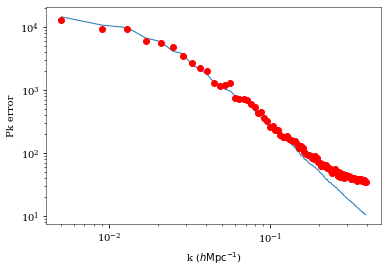

In [7]:
plt.loglog(kc, np.sqrt(2/nk) * pk_b)
plt.loglog(kc, np.std(data, axis=0), "o", c='r')
plt.xlabel("k ($h {\\rm Mpc}^{-1}$)")
plt.ylabel("Pk error")

In [8]:
C = np.cov(np.transpose(data))
s = C.diagonal()**.5
corr = C/np.outer(s, s)

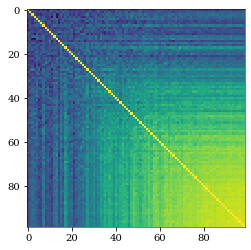

In [9]:
plt.imshow(corr)
plt.colorbar()